# 2021秋冬版本

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd, Day
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 题目一 （25分）

- (1) 读取stockbasis.csv文件，并存在一个命名为stock_basis的DataFrame中。运用DataFrame的方法检查数据，对字符类型数据进行清洗并去掉重复值。
- (2) 根据注册地信息，算出各个省份的上市公司数目并存在命名为“area_count”的Series里，并画柱状图展示(figsize = (12,5)，无法显示中文也没关系)。
- (3) 根据stock_basis，提取广东省份的公司的数据，存放在一个命名为GD_basis的DataFrame里，输出前五行(head)。提取GD_basis里面的行业信息，并汇报出一共有几个不同的行业。拥有最多上市公司的行业是哪个？
- (4) 按照(3)对浙江省的数据进行操作。
- (5) 将浙江省和广东省的公司所对应的debtpaying数据提取出来分别放在ZJ_debtpaying和GD_debtpaying两个DataFrame里，并输出它们的描述统计量。

In [26]:
#（1-1）读取stockbasis.csv数据，并检查数据
stock_basis = pd.read_csv('stockbasis.csv')
stock_basis.info()
stock_basis.head()
stock_basis.describe()
stock_basis['code'].value_counts() #检验是否存在重复的code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4067 entries, 0 to 4066
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              4067 non-null   int64  
 1   name              4067 non-null   object 
 2   industry          4067 non-null   object 
 3   area              4067 non-null   object 
 4   pe                4067 non-null   float64
 5   outstanding       4067 non-null   float64
 6   totals            4067 non-null   float64
 7   totalAssets       4067 non-null   float64
 8   liquidAssets      4067 non-null   float64
 9   fixedAssets       4067 non-null   float64
 10  reserved          4067 non-null   float64
 11  reservedPerShare  4067 non-null   float64
 12  esp               4067 non-null   float64
 13  bvps              4067 non-null   float64
 14  pb                4067 non-null   float64
 15  timeToMarket      4067 non-null   int64  
 16  undp              4067 non-null   float64


688128    1
300380    1
300348    1
300352    1
2160      1
         ..
725       1
600993    1
2170      1
2776      1
600063    1
Name: code, Length: 4067, dtype: int64

In [27]:
#(1-2)对于字符类型数据进行清理并去除重复值
stock_basis['code'] = stock_basis['code'].astype(str).str.zfill(6)
stock_basis['name'] = stock_basis['name'].str.strip().str.replace(' ','')
stock_basis['industry'] = stock_basis['industry'].str.strip().str.replace(' ','')
stock_basis['area'] = stock_basis['area'].str.strip().str.replace(' ','')
stock_basis.drop_duplicates(inplace = True)

In [28]:
stock_basis.head()

,code,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
0,300898,N熊猫,乳制品,浙江,341.95,0.26,1.24,6.79,4.18,1.72,...,5.63,11.04,20201016,1.21,0.98,0.00,0.00,21.70,4.78,31032.0
1,300899,N凯鑫,环境保护,上海,95.21,0.16,0.64,3.18,2.51,0.29,...,9.43,8.27,20201016,1.36,2.14,0.00,0.00,41.02,27.32,31911.0
2,688386,N泛亚,化工原料,江苏,91.45,0.14,0.70,4.18,1.55,1.93,...,7.39,6.25,20201016,0.84,1.21,0.00,0.00,46.71,16.05,15240.0
3,300147,香雪制药,中成药,广东,30.21,6.51,6.61,98.14,38.33,19.44,...,5.46,2.36,20101215,8.13,1.23,37.11,152.47,31.05,7.77,49156.0
4,300402,宝色股份,专用机械,江苏,120.65,2.02,2.02,17.68,12.31,4.27,...,3.27,6.87,20141010,1.96,0.97,34.93,54.84,18.04,3.44,17980.0


<AxesSubplot:>

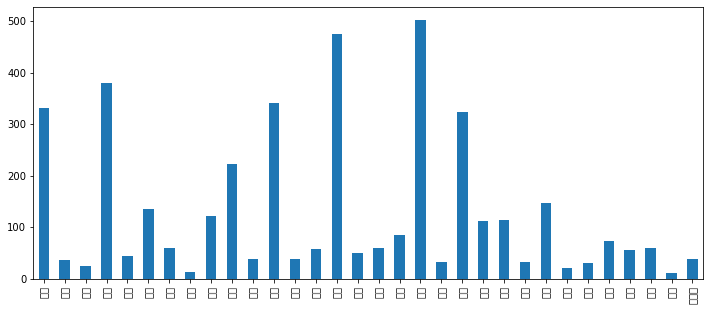

In [30]:
#（2-1）根据注册地信息，算出各个省份的上市公司数目并存在命名为“area_count”的Series里,并绘制柱状图
area_group=stock_basis.groupby('area')
area_count=pd.Series([len(area_group.get_group(i)) for i in area_group.groups.keys()],index=area_group.groups.keys())
area_count.plot(kind='bar',figsize = (12,5))

In [35]:
#（3-1）根据stock_basis，提取广东省份的公司的数据，存放在一个命名为GD_basis的DataFrame里，输出前五行(head)
GD_basis = stock_basis[stock_basis['area']=='广东']
SZ_basis = stock_basis[stock_basis['area']=='深圳']
frames=[GD_basis,SZ_basis]
GD_basis = pd.concat(frames)
GD_basis.head()

,code,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
3,300147,香雪制药,中成药,广东,30.21,6.51,6.61,98.14,38.33,19.44,...,5.46,2.36,20101215,8.13,1.23,37.11,152.47,31.05,7.77,49156.0
9,300335,迪森股份,供气供热,广东,466.40,2.72,3.63,33.06,13.98,9.18,...,3.57,2.51,20120710,5.81,1.60,-18.71,-93.68,27.62,0.75,17836.0
13,300297,蓝盾股份,软件服务,广东,0.00,9.97,12.50,83.27,47.97,6.92,...,3.01,1.93,20120315,2.23,0.18,-48.92,-146.50,36.33,-13.54,64296.0
14,300030,阳普医疗,医疗保健,广东,23.73,2.54,3.09,16.01,7.73,2.68,...,3.05,5.31,20091225,2.01,0.65,54.94,541.76,50.53,26.21,42000.0
18,300155,安居宝,元器件,广东,78.54,2.82,5.43,16.34,12.19,1.78,...,2.29,4.10,20110107,2.80,0.52,-1.39,10.46,39.27,9.34,31728.0


In [38]:
#(3-2)提取GD_basis里面的行业信息，并汇报出一共有几个不同的行业，得出拥有最多上市公司的行业是哪个。
GDindustry_count=GD_basis['industry'].value_counts()
GDindustry_count
print('结论：广东一共有89个不同的行业，其中拥有最多上市公司的行业是【元器件】行业')

结论：广东一共有89个不同的行业，其中拥有最多上市公司的行业是【元器件】行业


In [40]:
#(4-1)按照(3)对浙江省的数据进行操作。
ZJ_basis = stock_basis[stock_basis['area']=='浙江']
ZJ_basis.head()
ZJindustry_count=ZJ_basis['industry'].value_counts()
ZJindustry_count
#print('结论：浙江一共有81个不同的行业，其中拥有最多上市公司的行业是【汽车配件】行业')

汽车配件    38
电气设备    30
机械基件    25
专用机械    24
化学制药    24
        ..
轻工机械     1
超市连锁     1
石油开采     1
汽车服务     1
港口       1
Name: industry, Length: 81, dtype: int64

In [41]:
#（5-1）将浙江省和广东省的公司所对应的debtpaying数据提取出来分别放在ZJ_debtpaying和GD_debtpaying两个DataFrame里
debtpaying = pd.read_csv('debtpaying.csv')
ZJ_debtpaying = debtpaying[stock_basis['area']=='浙江']
GD_debtpaying = debtpaying[stock_basis['area']=='广东']

In [43]:
#（5-2）输出它们的描述统计量
print(ZJ_debtpaying.describe())
print(GD_debtpaying.describe())

        Unnamed: 0           code
count   458.000000     458.000000
mean   1883.403930  329914.347162
std    1140.179214  272534.794112
min       0.000000      30.000000
25%     931.500000    2506.750000
50%    1850.500000  300555.500000
75%    2934.000000  600964.750000
max    3813.000000  688599.000000
        Unnamed: 0           code
count   324.000000     324.000000
mean   1966.805556  332604.077160
std    1127.512170  272207.974796
min       3.000000      45.000000
25%    1006.750000    2535.250000
50%    2019.500000  300662.000000
75%    2912.750000  600906.250000
max    3826.000000  688585.000000


# 题目二（10分）

（1） 读取tfns12type1.csv文件，各变量名如下：
- fundno: Fund Number
- rdate: Report Date	
- fdate: File Date	

- ioc: Investment Objective Code	
完成以下操作：

- 本数据集是关于基金的数据，将ioc为1,5,6,7的基金去除；
- 对于每一个基金的时间，做以下处理：
    - 对每一个report date，将它对应的月份里所有report date里面最晚的一天作为当月的'rdate'（有可能出现一个月多个rdate），
    - 对每一个report date，将它对应的月份里所有File date里面最早一天作为当月的'fdate',
    - 将选出来的'rdate','fdate'与'fundno'一起保存在新DataFrame里;
    - 按照顺序对'fundno'和'rdate'进行排序，输出DataFrame的前20行和info。
- 判断数据中(fundno,rdate)作为key是否存在重复？如果存在，应如何处理？
- 有多少个基金的Report的时间跨度超过1000天？
- 基金一般指要求半年披露一次报告，有些基金每季度披露一次，故对披露日期进行调整。在DataFrame里定义新的一列'ndate'(下一个披露的时间),对于每一个基金，'ndate'与'rdate'有以下关系：
    - 'rdate'里最后一天对应的下一次披露的'ndate'为半年后
    - 对于每一个'rdate',如果下一期的'rdate'与本期相距时间大于半年，则设置对应的'ndate'为'rdate'半年后，反之设为下一期的'rdate'. 
    - 输出整理好的DataFrame的前20行。

In [93]:
#（1-1）读取tfns12type1.csv文件,去除ioc为1,5,6,7的数据
fund_basis=pd.read_csv('tfns12type1.csv')
fund_basis = fund_basis[fund_basis['ioc'] != 1.0]
fund_basis = fund_basis[fund_basis['ioc'] != 5.0]
fund_basis = fund_basis[fund_basis['ioc'] != 7.0]
fund_basis = fund_basis[fund_basis['ioc'] != 6.0]
fund_loc_clear = fund_basis.copy()


In [94]:
#（1-2）进行最早一天和最晚一天的处理
fund_groups=fund_loc_clear.groupby('fundno')
fund_agg=fund_groups.agg({'rdate':'min','fdate':'max'})
fund_agg.reset_index(inplace=True)
fund_agg.sort_values(['fundno','rdate'],inplace=True)

In [95]:
fund_agg

,fundno,rdate,fdate
0,20005.0,1995-08-19,2000-10-25
1,20006.0,1995-08-19,2000-07-25
2,20010.0,1997-05-20,2001-01-25
3,20012.0,1995-11-19,2000-10-25
4,20013.0,1995-08-19,1995-07-25
...,...,...,...
21141,116905.0,1998-05-20,2000-01-25
21142,116906.0,1998-05-20,2000-01-25
21143,116907.0,1998-05-20,1999-07-25
21144,116908.0,1998-05-20,1999-07-25


In [96]:
#（1-2）输出新的Dataframe的前20行和info
print(fund_agg.head(20))
print(fund_agg.info())

     fundno       rdate       fdate
0   20005.0  1995-08-19  2000-10-25
1   20006.0  1995-08-19  2000-07-25
2   20010.0  1997-05-20  2001-01-25
3   20012.0  1995-11-19  2000-10-25
4   20013.0  1995-08-19  1995-07-25
5   20015.0  1995-11-19  2000-10-25
6   20017.0  1995-11-19  2000-10-25
7   20018.0  1995-08-19  1998-04-25
8   20020.0  1995-11-19  2000-10-25
9   20021.0  1995-11-19  2000-10-25
10  20022.0  1995-11-19  2000-10-25
11  20025.0  1995-08-19  2000-10-25
12  20027.0  1995-08-19  2000-07-25
13  20028.0  1995-08-19  2000-10-25
14  20029.0  1996-11-19  2001-04-25
15  20033.0  1995-11-19  1998-04-25
16  20034.0  1995-11-19  1998-04-25
17  20035.0  1995-11-19  1998-04-25
18  20036.0  1995-11-19  1998-04-25
19  20038.0  1995-11-19  1998-04-25
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21146 entries, 0 to 21145
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fundno  21146 non-null  float64
 1   rdate   21146 non-nu

In [97]:
#（1-3）判断数据中(fundno,rdate)作为key是否存在重复
fund_agg.set_index(['fundno','rdate'])
fund_agg[['fundno','rdate']].value_counts()

fundno    rdate     
20005.0   1995-08-19    1
90009.0   1996-02-19    1
89937.0   1999-02-19    1
89930.0   1999-02-19    1
89928.0   1999-02-19    1
                       ..
49618.0   1999-05-20    1
49617.0   1999-05-20    1
49616.0   1999-05-20    1
49615.0   2000-08-19    1
117000.0  1996-08-19    1
Length: 21146, dtype: int64

In [98]:
#结论：不存在重复，如果存在重复的情况，则利用value_counts()找出重复的索引值，然后利用drop去除对应的行

In [99]:
#（1-4）统计有多少个基金的Report的时间跨度超过1000天
fund_groups_new =fund_loc_clear.groupby('fundno')
fund_new_agg = fund_groups_new.agg(rdate_min=('rdate','min'),rdate_max=('rdate','max'))
fund_new_agg['rdate_max'] = pd.to_datetime(fund_new_agg['rdate_max'])
fund_new_agg['rdate_min'] = pd.to_datetime(fund_new_agg['rdate_min'])
fund_new_agg['diff'] = fund_new_agg['rdate_max']-fund_new_agg['rdate_min']
print(len(fund_new_agg[fund_new_agg['diff']>pd.to_timedelta('1000 days')]))

6245


In [100]:
#（1-5）计算新的ndate
from datetime import timedelta
delta_0d = timedelta(days=0)
delta_180d= timedelta(days=180)

fundnolist = set(fund_loc_clear['fundno'])
fund_loc_clear['diff'] = fund_new_agg['rdate_max']-fund_new_agg['rdate_min']
fund_loc_clear['rdate'] = pd.to_datetime(fund_loc_clear['rdate'])
fund_agg2 = fund_loc_clear.groupby('fundno')

ndate = []
for i in fundnolist:
    fund_agg2.get_group(i)['diff'][0] = delta_0d
    for j in range(len(fund_agg2.get_group(i))-1):
        if fund_agg2.get_group(i)['diff'].iloc[j+1] > delta_180d:
            ndate.append(fund_agg2.get_group(i)['rdate'].iloc[j]+delta_180d)
        else:
            ndate.append(fund_agg2.get_group(i)['rdate'].iloc[j+1])
    ndate.append(fund_agg2.get_group(i)['rdate'].iloc[-1]+delta_180d)
fund_loc_clear['ndate']=ndate


In [101]:
#（1-5）输出前20行
fund_loc_clear.head(20)

,fundno,rdate,fdate,ioc,diff,ndate
2,20056.0,1995-05-20,1995-04-25,3.0,NaT,1995-11-19
3,20057.0,1995-05-20,1995-04-25,3.0,NaT,1996-02-19
4,20058.0,1995-05-20,1995-04-25,3.0,NaT,1996-05-20
6,20082.0,1995-05-20,1995-04-25,3.0,NaT,1996-08-19
7,20083.0,1995-05-20,1995-04-25,3.0,NaT,1996-11-19
9,20107.0,1995-05-20,1995-04-25,3.0,NaT,1997-02-19
10,20115.0,1995-05-20,1995-04-25,3.0,NaT,1997-05-20
11,20118.0,1995-05-20,1995-04-25,3.0,NaT,1997-08-19
12,20126.0,1995-05-20,1995-04-25,3.0,NaT,1997-11-19
13,20127.0,1995-05-20,1995-04-25,2.0,NaT,1998-05-18


(2) 读取MFlink.csv，各变量名如下：
- fundno: Fund Number
- fdate: File Date
- wficn: Wharton Financial Institution Center Number

完成以下操作：
- 找出（1）题里整理好的数据集，对应每一个File Date，找出每个基金对应的wficn；输出DataFrame的前20行；
- 汇报有多少个基金在第一天对应的wficn缺失了？占全部基金的百分之多少？
- 汇报每个基金有多少天wficn缺失以及占对应的观测值个数的百分比,将计算出来的确实的天数和百分比一起存在DataFrame并输出前10个fund的数据（按从小到大）。
- 汇报每个File Date有多少个基金wficn缺失，以及其占每天观测值个数的百分比，将计算出来的确实的天数和百分比一起存在DataFrame并输出前10天的数据（按照从早到迟）。
- 对于每一个基金，每个rdate所对应的月份里面如果出现多个相同的wficn，操作会带来不变，这里同个月份里面每个基金同个wficn只保留一个。请完成该操作并输出DataFrame的info和前20行。

In [12]:
# (2-1）找出基金对应的wficn，并且输出前20行
MFlink_data = pd.read_csv('MFlink.csv')
merge_columns=['fundno','fdate']
fund_basis_merge = fund_basis[merge_columns]
data_merged = pd.merge(fund_basis_merge,MFlink_data,on=['fundno','fdate'])
data_merged.head(20)

,fundno,fdate,wficn
0,20056.0,1995-04-25,NaN
1,20057.0,1995-04-25,103332.0
2,20058.0,1995-04-25,NaN
3,20082.0,1995-04-25,105386.0
4,20083.0,1995-04-25,105387.0
5,20107.0,1995-04-25,102942.0
6,20115.0,1995-04-25,NaN
7,20118.0,1995-04-25,105408.0
8,20126.0,1995-04-25,105410.0
9,20127.0,1995-04-25,105411.0


In [45]:
#(2-2)汇报有多少基金缺失了wficn，并计算缺失比例
data_merged_fir = data_merged.groupby('fundno').apply(lambda x :x[x.fdate == x.fdate.min()])
loss = data_merged_fir['wficn'].isna().sum()
num = data_merged_fir.shape[0]
per = loss/num
print('结论：有17585支基金第一天的wficn值是缺失的，占据了全部基金的83.2%')

结论：有17585支基金第一天的wficn值是缺失的，占据了全部基金的83.2%


In [14]:
#（2-3）汇报每个基金有多少天数据缺失及其百分比
data_grouped = data_merged.groupby('fundno')
fundnoset=set(data_merged['fundno'])
loss2=[]
for i in fundnoset:
    t=data_grouped.get_group(i)['wficn'].isna().sum()
    loss2.append(t)
    
data_grouped = data_merged.groupby('fundno')
data_agg=data_grouped.agg({'fdate':'count'})
total=[]
rate=[]
for i in data_agg['fdate']:
    total.append(i)
for i in range(len(loss2)):
    n=loss2[i]/total[i]
    rate.append(n)

In [15]:
data = {}
data_index = data_merged.groupby('fundno').apply(lambda x:x.wficn.isna().sum).index
data['fundno']=data_index
data['count']=loss2
data['rate']=rate
data_df=pd.DataFrame(data)

In [16]:
data_merged_fir.reset_index(drop=True,inplace=True)
data_df=pd.merge(data_merged_fir,data_df,on=['fundno'])
data_df.sort_values('count').head(10)

,fundno,fdate,wficn,count,rate
0,20005.0,1995-07-25,105342.0,0,0.0
12454,75629.0,2000-10-25,109177.0,0,0.0
12455,75630.0,2000-10-25,401463.0,0,0.0
12456,75633.0,2000-10-25,109179.0,0,0.0
12457,75634.0,2000-10-25,109180.0,0,0.0
12458,75635.0,2000-10-25,109181.0,0,0.0
12459,75636.0,2000-10-25,109182.0,0,0.0
12444,75607.0,2000-10-25,109176.0,0,0.0
12460,75637.0,2000-10-25,109183.0,0,0.0
12470,75655.0,2000-10-25,500670.0,0,0.0


In [59]:
#（2-4）汇报每个File Date有多少个基金wficn缺失，以及其占每天观测值个数的百分比
data_grouped2 = data_merged.groupby('fdate')
fdateset=set(data_merged['fdate'])
loss3=[]
for i in fdateset:
    t=data_grouped2.get_group(i)['wficn'].isna().sum()
    loss3.append(t)
    
data_agg2=data_grouped2.agg({'fdate':'count'})
total2=[]
rate2=[]
for i in data_agg2['fdate']:
    total2.append(i)
for i in range(len(loss3)):
    n=loss3[i]/total2[i]
    rate2.append(n)

data2 = {}
data_index2 = data_merged.groupby('fdate').apply(lambda x:x.wficn.isna().sum).index
data2['fdate']=data_index2
data2['count']=loss3
data2['rate']=rate2
data_df2=pd.DataFrame(data2)

data_merged_fir.reset_index(drop=True,inplace=True)
data_df=pd.merge(data_merged_fir,data_df2,on=['fdate'])
data_df2.head(10)

,fdate,count,rate
0,1995-04-25,9049,17.954365
1,1995-07-25,9416,4.843621
2,1995-10-25,128,0.043302
3,1996-01-25,6203,1.304522
4,1996-04-25,4391,0.814959
5,1996-07-25,3823,0.615224
6,1996-10-25,3861,0.704048
7,1997-01-25,7614,0.941628
8,1997-04-25,4481,0.556577
9,1997-07-25,8674,1.074712


In [107]:
#（2-5）对于每一个基金，每个rdate所对应的月份里面如果出现多个相同的wficn，操作会带来不变，这里同个月份里面每个基金同个wficn只保留一个
MFlink_data = pd.read_csv('MFlink.csv')
merge_columns=['fundno','rdate','fdate']
fund_basis_merge = fund_basis[merge_columns]
data_merged = pd.merge(fund_basis_merge,MFlink_data,on=['fundno','fdate'])
data_merged['rdate'] = pd.to_datetime(data_merged['rdate'])
data_merged['rdate'] = data_merged['rdate'].apply(lambda x : x.strftime('%Y-%m'))
data_merged = data_merged.fillna(value=0)

In [109]:
data_merged['rdate'] = pd.to_datetime(data_merged['rdate'])
data_merged['rdate'] = data_merged['rdate'].apply(lambda x : x.strftime('%Y-%m'))

In [114]:
fundno = []
rdata = []
wficn = []
data_fu = data_merged.groupby('fundno')
for i in data_fu:
    cnt = i[1].groupby('rdate')
    wf = []
    for j in cnt:
        k = j[1]['wficn']
        for l in k:
            if l not in wf:
                wf.append(l)
        for p in wf:
            fundno.append(i[0])
            rdata.append(j[0])
            wficn.append(p)


In [115]:
data3 = {}
data3['fundon']=fundno
data3['rdata']=rdata
data3['wficn']=wficn
data_df3=pd.DataFrame(data3)

print(data_df3.info())
data_df3[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028768 entries, 0 to 1028767
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   fundon  1028768 non-null  float64
 1   rdata   1028768 non-null  object 
 2   wficn   48806 non-null    float64
dtypes: float64(2), object(1)
memory usage: 23.5+ MB
None


,fundon,rdata,wficn
0,20005.0,1995-08,105342.0
1,20005.0,1995-11,105342.0
2,20005.0,1996-02,105342.0
3,20005.0,1996-05,105342.0
4,20005.0,1996-08,105342.0
5,20005.0,1996-11,105342.0
6,20005.0,1997-02,105342.0
7,20005.0,1997-05,105342.0
8,20005.0,1997-08,105342.0
9,20005.0,1997-11,105342.0


# 题目三（15分）

(1) 读取数据DataUsed3.csv存在一个DataFrame（可命名为:DataUsed）里面，其中变量分别为
- permno: 股票代码
- date:日期,月度数据
- retadj:已调整收益率
- BM: book-to-market比率
- me: 市值

再读取FF3Rf.csv，从中提取无风险收益率跟上述数据合并（其他变量不需要提取）
- Rf:每月无风险收益率($\times$100)
- 其他：Fama-French 3因子

完成以下练习，
- 将permno转为整数型
- 将date转为合适的时间类型，若为timestamp，请对齐到月末
- 确定数据的key，确认是有存在重复并进行处理
- 计算每个股票在每个阅读的超额收益并将它存在
$$retExcess_{it} = retadj_{it} - Rf_{t}$$
- 按照顺序对permno,date进行排序
- 输出整理好的数据的info和前10行

In [2]:
# （1）将permno转为整数型，并将date转为合适的时间类型，若为timestamp，请对齐到月末
DataUsed = pd.read_csv("DataUsed03.csv")
FF3Rf = pd.read_csv("FF3Rf.csv")
DataUsed["permno"] = DataUsed["permno"].astype('int64')
DataUsed["date"] = pd.to_datetime(DataUsed["date"])
DataUsed["date"] = DataUsed["date"].apply(lambda x : x.strftime('%Y-%m'))

FF3Rf["date"] = FF3Rf["date"]*100+1
FF3Rf["date"] = FF3Rf["date"].astype("str")
FF3Rf["date"] = pd.to_datetime(FF3Rf["date"])
FF3Rf["date"] = FF3Rf["date"].apply(lambda x : x.strftime('%Y-%m'))
Need = ["date","RF"]
FF3Rf_use = FF3Rf[Need]

Data_merge = pd.merge(DataUsed, FF3Rf_use, on = 'date', how = 'left')
Data_merge = Data_merge.fillna(0)

#计算每个股票在每个阅读的超额收益，并按照顺序对permno，date进行排序
Data_new = Data_merge.assign(retExcess= Data_merge['retadj'] - Data_merge['RF'] )
Data_new = Data_new.assign(key = Data_merge['permno'].map(str) +':'+ Data_merge['date'].map(str) )
Data = Data_new.set_index('key')

#输出整理好的数据的info和前10行
print(Data.info())
Data[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 4230930 entries, 20000:1985-12 to 103436:2015-10
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   permno      int64  
 2   date        object 
 3   retadj      float64
 4   BM          float64
 5   me          float64
 6   RF          float64
 7   retExcess   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 290.5+ MB
None


,Unnamed: 0,permno,date,retadj,BM,me,RF,retExcess
key,,,,,,,,
20000:1985-12,0,20000,1985-12,0.000000,0.0,0.000000,0.65,-0.650000
20000:1986-01,1,20000,1986-01,0.000000,0.0,92.875987,0.56,-0.560000
20000:1986-02,2,20000,1986-02,-0.141839,0.0,-6.250743,0.53,-0.671839
20000:1986-03,3,20000,1986-03,0.340141,0.0,126.649494,0.60,-0.259859
20000:1986-04,4,20000,1986-04,-0.000459,0.0,205.584733,0.52,-0.520459
20000:1986-05,5,20000,1986-05,-0.171234,0.0,66.401292,0.49,-0.661234
20000:1986-06,6,20000,1986-06,0.017093,0.0,30.526381,0.52,-0.502907
20000:1986-07,7,20000,1986-07,-0.187812,0.0,-22.794510,0.52,-0.707812
20000:1986-08,8,20000,1986-08,-0.634334,0.0,156.060347,0.46,-1.094334


(2) 数据的筛选和时间动量特征的构建

每个股票$i$每个月$t$(包括该月t)的时间动量特征，也即过去6个月的累计收益计算公式为：
$$\tilde{r}^{i}_{t-12,t}=\frac{1}{6}\prod_{j=t-6}^{t}(1+retadj^{i}_{j}) - \frac{1}{6}\prod_{j=t-6}^{t}(1+RF_{j})$$

为了计算该特征，将采取以下操作：
- 取1995-01-01后的数据，进行下一步研究.
- 保证选取的样本里面，每个入选的股票起码具有大于3年(36个月)的retadj收益率观察数据
- 保证选取的样本里面，每个月份的股票数据起码要有4000个
- 根据上述两步筛选完后，按照顺序对permno,date进行排序
- 输出整理好的数据的info和前10行

接着
- 计算每个股票$i$每个月$t$的动量特征值$\tilde{r}^{i}_{t-12,t}$并保存到本地.
- 对每个股票$i$的动量特征值进行标准化，保证标准化后$\tilde{r}^{i}_{t-12,t}$均值为0方差为1.
- 按照顺序对permno,date进行排序，输出数据集的最后20行

In [3]:
# （2-1）取1995-01-01之后的数据，并进行两步筛选，排序和输出
Data1 = Data.loc[Data['date']>="1995-01"]
Data2 = Data1.groupby('date').transform('count')

Data3 = Data2.loc[Data2['permno'] > 4000 ]
Data_count = pd.DataFrame(Data3['permno'])
Data_count.columns = ['count']
Data_res = pd.merge(Data1, Data_count, on = 'key', how = 'right').drop('count',axis = 1)

Data_p = Data_res.groupby('permno').transform('count')
Data_pp = Data_p.loc[Data_p['retadj'] > 36]
Data_count1 = pd.DataFrame(Data_pp['retadj'])
Data_count1.columns = ['count']
Data_f = pd.merge(Data_res, Data_count1, on = 'key', how = 'right').drop('count',axis = 1)

print(Data_f.info())
Data_f[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 1785704 entries, 20001:1995-01 to 103436:2015-10
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   permno      int64  
 2   date        object 
 3   retadj      float64
 4   BM          float64
 5   me          float64
 6   RF          float64
 7   retExcess   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 122.6+ MB
None


,Unnamed: 0,permno,date,retadj,BM,me,RF,retExcess
key,,,,,,,,
20001:1995-01,128,20001,1995-01,0.058210,-0.607036,15.267961,0.42,-0.361790
20001:1995-02,129,20001,1995-02,0.049760,-0.580476,-79.736787,0.40,-0.350240
20001:1995-03,130,20001,1995-03,-0.143395,-0.583198,74.476689,0.46,-0.603395
20001:1995-04,131,20001,1995-04,-0.119389,0.000000,157.945220,0.44,-0.559389
20001:1995-05,132,20001,1995-05,0.179626,-0.631988,164.423363,0.54,-0.360374
20001:1995-06,133,20001,1995-06,0.155545,-0.682955,-134.585923,0.47,-0.314455
20001:1995-07,134,20001,1995-07,-0.121725,-0.682955,-150.825911,0.45,-0.571725
20001:1995-08,135,20001,1995-08,-0.046030,-0.652183,87.900083,0.47,-0.516030
20001:1995-09,136,20001,1995-09,-0.107009,0.000000,52.479274,0.43,-0.537009


In [4]:
#（2-2）计算每个股票 𝑖 每个月 𝑡 的动量特征值，并进行标准化，排序后输出最后20行
Data_com = Data_f.groupby(['permno'])
r_p = []
r = []
for i in Data_com:
    cnt = []
    retadj = i[1]['retadj']
    rf = i[1]['RF']
    for j in range(5,len(retadj)):
        r1 = 1
        r2 = 1
        for k in range(6):
            r1 *= (1 + retadj[j-k])
            r2 *= (1 + rf[j-k])
        cnt.append((r1-r2)/6)
    cnt = np.array(cnt)
    mu = np.mean(cnt)
    sigma = np.std(cnt)
    cnt = (cnt-mu)/sigma
    r_p.append(cnt)
    for l in range(5):
        r.append(0)
    for l in cnt:
        r.append(l)
Data_f['r'] = r
print(Data_f.info())
Data_f[-20:]

<class 'pandas.core.frame.DataFrame'>
Index: 1785704 entries, 20001:1995-01 to 103436:2015-10
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   permno      int64  
 2   date        object 
 3   retadj      float64
 4   BM          float64
 5   me          float64
 6   RF          float64
 7   retExcess   float64
 8   r           float64
dtypes: float64(6), int64(2), object(1)
memory usage: 136.2+ MB
None


,Unnamed: 0,permno,date,retadj,BM,me,RF,retExcess,r
key,,,,,,,,,
103436:2014-03,4696886,103436,2014-03,-0.179920,-5.334401,25780.631143,0.0,-0.179920,-0.837327
103436:2014-04,4696887,103436,2014-04,0.133554,-5.332105,25742.696588,0.0,0.133554,-0.526690
103436:2014-05,4696888,103436,2014-05,0.137058,0.000000,25619.913674,0.0,0.137058,0.440010
103436:2014-06,4696889,103436,2014-06,0.159769,-3.802931,29899.525040,0.0,0.159769,0.531343
103436:2014-07,4696890,103436,2014-07,-0.076646,-3.730895,27812.039493,0.0,-0.076646,0.052503
103436:2014-08,4696891,103436,2014-08,0.251920,0.000000,33707.816820,0.0,0.251920,0.012458
103436:2014-09,4696892,103436,2014-09,-0.186873,-3.820011,30532.569617,0.0,-0.186873,-0.001767
103436:2014-10,4696893,103436,2014-10,0.002300,-3.816092,30159.383466,0.0,0.002300,-0.194372
103436:2014-11,4696894,103436,2014-11,0.077932,0.000000,30731.754904,0.0,0.077932,-0.270853


(3) 对每个股票$i$进行以下线性回归，这里考虑'HAC'稳健标准误差且滞后期设置为6个月，
$$retExcess_{t+1}^{i}=\alpha_{1}+\beta_{1}\tilde{r}_{t-12,t}^{i}+\varepsilon_{t+1}^{i},$$
这里$\tilde{r}_{t-12,t}^{i}$是已经标准化后的动量特征。将结果存在以每个股票$i$为index（并以此排序），列变量分别为$\hat{\beta}_{1}\times 100$, $\beta_{1}$的t值和$adjR^2\times 100$的DataFrame里并输出前20个。

In [5]:
# （3）进行线性回归
permno = []
beta = []
t = []
adjR = []
for i in Data_com:
    permno.append(i[0])
    r = i[1]['r'] 
    rE = i[1]['retExcess']
    r = r[5:len(r)-6]
    rE = rE[11:len(rE)]
    r = np.array(r)
    rE = np.array(rE)
    #r = sm.add_constant(r)
    
    model = sm.OLS(rE,r)
    results = model.fit()
    beta.append(results.params*100)
    t.append(results.tvalues)
    adjR.append(results.rsquared_adj)
    
t_f = []
beta_f = []
for i in range(len(t)):
    t_f.append(t[i][0])
    beta_f.append(beta[i][0])
    
Data_dict = {'permno':permno, 'beta*100':beta_f, 't':t_f,'adjR':adjR }
Res = pd.DataFrame(data=Data_dict)
Res[:20]

,permno,beta*100,t,adjR
0,20001,16.052314,10.617803,0.318579
1,20002,15.659608,7.529376,0.212003
2,20009,-5.192834,-0.810074,-0.005763
3,20011,6.779001,0.776889,-0.014902
4,20012,7.949050,1.844938,0.020132
5,20016,-7.792777,-1.271688,0.009265
6,20019,23.141487,3.407726,0.118428
7,20025,16.656468,9.565501,0.274656
8,20026,16.913434,11.083291,0.337655
9,20028,15.948064,8.365352,0.223973


(4) 因子载荷动态变化下的动态资产组合分组

运用(3)整理好的数据，继续做以下操作：

- 保证每只股票的retExcess和BM观测值不少了24个月

- 以24个月为窗口，对每个股票$i$进行以下线性回归，这里考虑'HAC'稳健标准误差且滞后期设置为12个月，
$$retExcess_{t+1}^{i}=\alpha_{i}+\beta_{it}BM^{i}+\varepsilon_{t+1}^{i},$$
调用命令如下，
```python
from statsmodels.regression.rolling import RollingOLS
```
运用pickle保存每个股票每个月的回归拟合对象(.fit())

- 由上述算出来的$\beta_{it}$,可知它随时间变动而变动，计算每只股票$i$的$\beta_{it}$的均值和标准差，输出前10行，分别画出它们的箱状图。
- 将每个月BMbeta超过当月所有股票的BMbeta的99%分位数和小于当月所有股票的BMbeta的1%分位数的股票去掉，输出缩尾处理后的DataFrame的前10行和info，再计算每只股票$i$的$\beta_{it}$的均值和标准差，输出前10行和重新画出箱状图.

In [6]:
# （4-1）计算每只股票 𝑖 的 𝛽𝑖𝑡 的均值和标准差
from statsmodels.regression.rolling import RollingOLS
permno = []
mean_ = []
std_ = []
beta_all = []
for i in Data_com:
    rE = i[1]['retExcess']
    BM = i[1]['BM']
    rE = rE[0:len(rE)-11]
    BM = BM[11:len(BM)]
    y = np.array(rE)
    x = np.array(BM)
    window = 24
    model_rols = RollingOLS(y,x,window)
    results = model_rols.fit()
    beta = np.array(results.params[23:])
    beta_all.append(beta)
    mu = np.mean(beta)
    sigma = np.std(beta)
    permno.append(i[0])
    mean_.append(mu)
    std_.append(sigma)
Data_dict = {'permno':permno, 'beta_mean':mean_, 'beta_std':std_ }
Res4 = pd.DataFrame(data=Data_dict)
Res4[:10]

,permno,beta_mean,beta_std
0,20001,0.343276,0.310078
1,20002,0.419046,0.411986
2,20009,0.864759,0.091774
3,20011,0.350367,0.025690
4,20012,0.151879,0.097841
5,20016,0.325222,0.069464
6,20019,0.228076,0.565084
7,20025,0.160598,0.152624
8,20026,0.358350,0.400181
9,20028,0.139108,0.150885


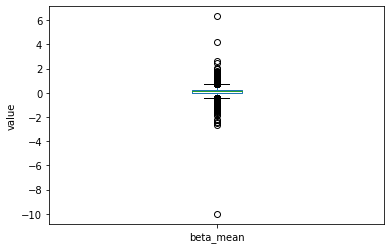

In [29]:
#（4-2）画出均值的箱型图
fig,axes = plt.subplots()
Res4[['beta_mean']].plot(kind='box',ax=axes)
axes.set_ylabel('value')
fig.savefig('p1.png') 

Text(0, 0.5, 'value')

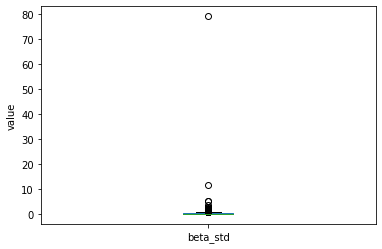

In [30]:
#（4-3）画出标准差的箱型图
fig,axes = plt.subplots()
Res4[['beta_std']].plot(kind='box',ax=axes)
axes.set_ylabel('value')

In [26]:
#(4-4) 去除极值后重新计算
mean_new = []
std_new = []
for beta in beta_all:
    beta = np.array(beta)
    beta = np.sort(beta,axis=None)
    a = len(beta)//100
    beta_new = beta[a:len(beta)-a]
    mu = np.mean(beta_new)
    sigma = np.std(beta_new)
    mean_new.append(mu)
    std_new.append(sigma)
Data_dict = {'permno':permno, 'beta_mean':mean_new, 'beta_std':std_new}
Res5 = pd.DataFrame(data=Data_dict)
print(Res5.info)
Res5[:10]
    

<bound method DataFrame.info of        permno  beta_mean  beta_std
0       20001   0.343890  0.303502
1       20002   0.416044  0.405011
2       20009   0.864759  0.091774
3       20011   0.350367  0.025690
4       20012   0.151879  0.097841
...       ...        ...       ...
14551  103429  -0.008932  0.004478
14552  103431        NaN       NaN
14553  103433  -0.064589  0.103167
14554  103434  -0.017513  0.039981
14555  103436  -0.018230  0.010753

[14556 rows x 3 columns]>


,permno,beta_mean,beta_std
0,20001,0.343890,0.303502
1,20002,0.416044,0.405011
2,20009,0.864759,0.091774
3,20011,0.350367,0.025690
4,20012,0.151879,0.097841
5,20016,0.325222,0.069464
6,20019,0.228076,0.565084
7,20025,0.158402,0.146831
8,20026,0.351955,0.385914
9,20028,0.138575,0.141556


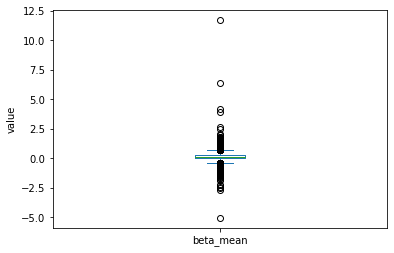

In [27]:
#（4-5）画出均值的箱型图
fig,axes = plt.subplots()
Res5[['beta_mean']].plot(kind='box',ax=axes)
axes.set_ylabel('value')
fig.savefig('p1.png') 

Text(0, 0.5, 'value')

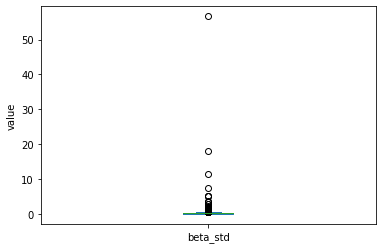

In [28]:
#（4-6）画出标准差的箱型图
fig,axes = plt.subplots()
Res5[['beta_std']].plot(kind='box',ax=axes)
axes.set_ylabel('value')

(5) 资产组合
- 按照上述步骤处理完后，每个月按照BMbeta对当月所有股票进行分成5组(pd.qcut)，算出各组的等权重(equally-weighted)资产组合收益率(用retadj计算)，结果放在一个新的DataFrame里,输出该DataFrame的前10行。
- 按照上述步骤处理完后，每个月按照BMbeta对当月所有股票进行分成5组(pd.qcut)，算出各组的市值权重(value-weighted,value为ME)资产组合收益率(用retadj计算)，结果放在一个新的DataFrame里,输出该DataFrame的前10行。

In [91]:
# 这里作答(5)
# (5-1) 等权重配置
BM = []
for i in beta_all:
    for j in range(34):
        BM.append(0)
    for j in i:
        BM.append(j[0])
Data_f['BM'] = BM
Data_final = Data_f.loc[Data_f['BM']!= 0]
Data_month = Data_final.groupby('date')

month = []
group = []
for i in Data_month:
    month.append(i[0])
    data = i[1]
    cnt = pd.qcut(data.BM,5,[0,1,2,3,4])
    data['label'] = cnt
    c = data.groupby('label')
    g = []
    for j in c:
        re = np.mean(np.array(j[1]['retadj']))
        g.append(re)
    group.append(g)
G1 = []
G2 = []
G3 = []
G4 = []
G5 = []
for i in group:
    G1.append(i[0])
    G2.append(i[1])
    G3.append(i[2])
    G4.append(i[3])
    G5.append(i[4])
Data_dict = {'month':month, 'Group1':G1, 'Group2':G2, 'Group3':G3, 'Group4':G4, 'Group5':G5 }
Res5_1 = pd.DataFrame(data=Data_dict)
Res5_1[:10]

,month,Group1,Group2,Group3,Group4,Group5
0,1995-01,0.011754,-0.049323,0.079217,0.060259,-0.043918
1,1995-02,-0.167942,-0.038077,0.153996,-0.256400,0.234588
2,1995-03,0.032165,-0.083454,0.145336,0.090363,0.121353
3,1995-04,-0.055929,0.007137,0.301274,-0.021165,0.071566
4,1995-05,0.088706,-0.077176,0.078886,0.000918,0.065059
5,1995-06,-0.041580,0.176498,-0.032089,0.151173,0.086585
6,1995-07,0.071011,-0.061289,0.051162,0.015731,-0.106751
7,1995-08,0.059629,0.103687,0.217356,0.090218,0.038058
8,1995-09,-0.035190,0.021045,0.070767,0.012757,-0.037136
9,1995-10,0.022591,-0.158293,-0.091358,0.065668,0.139003


In [92]:
# 按照市值配置
month = []
group_new = []
for i in Data_month:
    month.append(i[0])
    data = i[1]
    cnt = pd.qcut(data.BM,5,[0,1,2,3,4])
    data['label'] = cnt
    c = data.groupby('label')
    g = []
    for j in c:
        ret = np.array(j[1]['retadj'])
        me = np.array(j[1]['me'])
        re = 0
        for l in range(len(ret)):
            re += ret[l]*me[l]/np.sum(me)
        g.append(re)
    group_new.append(g)
G1 = []
G2 = []
G3 = []
G4 = []
G5 = []
for i in group_new:
    G1.append(i[0])
    G2.append(i[1])
    G3.append(i[2])
    G4.append(i[3])
    G5.append(i[4])
Data_dict = {'month':month, 'Group1':G1, 'Group2':G2, 'Group3':G3, 'Group4':G4, 'Group5':G5 }
Res5_1 = pd.DataFrame(data=Data_dict)
Res5_1[:10]

,month,Group1,Group2,Group3,Group4,Group5
0,1995-01,-2.165733,0.071652,0.368477,0.057902,-0.464739
1,1995-02,-0.163963,-0.215431,1.556033,-1.035127,-0.070479
2,1995-03,0.190637,-0.679710,0.230688,-1.149203,-0.766088
3,1995-04,0.092578,-0.247924,0.716843,0.075578,0.112012
4,1995-05,-0.491379,-0.322319,0.202645,-0.152166,0.024585
5,1995-06,1.434342,-1.113653,-0.013891,-1.566154,-0.353802
6,1995-07,0.000347,-0.119007,0.205803,-0.054750,-0.119934
7,1995-08,0.134235,0.082227,0.060040,0.129622,-0.593357
8,1995-09,2.034083,0.014749,-0.535549,0.013688,-0.049133
9,1995-10,0.031850,-0.144924,0.233988,0.123396,0.068936
